# Mediation and Confounding in Causal Inference

## Problem Setup

This notebook demonstrates the distinction between **direct effects**, **total effects**, and how confounding/mediation relationships affect statistical inference.

### The Data Generating Process

We simulate three variables following these relationships:

**Step 1: Generate the first predictor**
$$x_1 \sim N(0, 2)$$

Intuitively: $x_1$ is drawn from a normal distribution with mean 0 and standard deviation 2.

**Step 2: Create a confounded/mediated relationship**
$$x_2 = \beta_{12} \cdot x_1 + \epsilon_{12}, \quad \epsilon_{12} \sim N(0, 1.5)$$

Intuitively: $x_2$ is partially determined by $x_1$ (scaled by $\beta_{12}$) plus random noise. When $\beta_{12} \neq 0$, the two predictors are correlated—this is the confounding/mediation pathway. The noise term ensures they're not perfectly related.

**Step 3: Generate the outcome**
$$y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \epsilon, \quad \epsilon \sim N(0, 0.5)$$

Intuitively: The outcome $y$ is determined by both $x_1$ and $x_2$ with direct effect sizes $\beta_1$ and $\beta_2$ respectively, plus measurement noise.

## Key Concepts

### Direct Effect vs. Total Effect

When you observe a simple bivariate relationship (e.g., regress $y$ on only $x_1$), you capture the **total effect**, which includes:

- The **direct effect** of $x_1$ on $y$ (coefficient $\beta_1$)
- The **indirect effect** through $x_2$: $x_1 \rightarrow x_2 \rightarrow y$ (magnitude: $\beta_{12} \times \beta_2$)

**Total effect of $x_1$ on $y$:**
$$\text{Total effect} = \beta_1 + \beta_{12} \cdot \beta_2$$

This is what you observe if you only look at $x_1$ without accounting for $x_2$.

**Direct effect of $x_1$ on $y$:**
$$\text{Direct effect} = \beta_1$$

This is the effect of $x_1$ after controlling for $x_2$.

### The Role of $\beta_{12}$

- When $\beta_{12} = 0$: The two predictors are independent. Total and direct effects coincide.
- When $\beta_{12} > 0$: $x_1$ and $x_2$ are positively correlated. The indirect pathway amplifies or dampens the total effect depending on the sign of $\beta_2$.
- When $\beta_{12} < 0$: $x_1$ and $x_2$ are negatively correlated. The relationship works in the opposite direction.

## Interactive Exploration

Use the sliders to adjust $\beta_1$, $\beta_2$, and $\beta_{12}$, and observe how these parameters affect all four plots simultaneously.

In [31]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

interactive(children=(FloatSlider(value=0.5, description='beta1', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

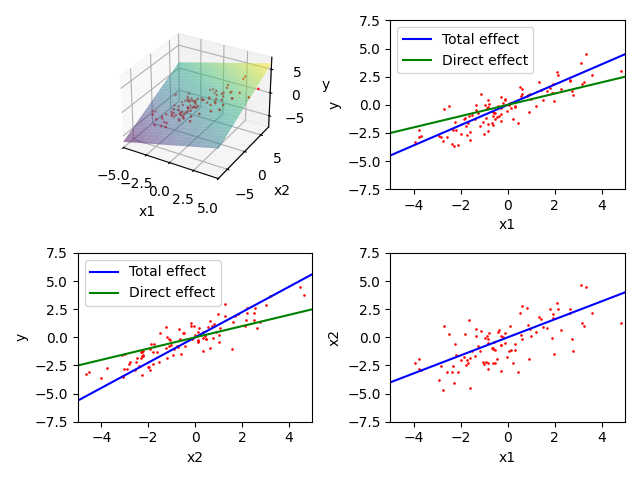

In [33]:
def plot_all(fig, x1, x2, y, beta1, beta2, beta12):
    xi = np.linspace(-5, 5, 30)
    xj = np.linspace(-7.5, 7.5, 30)
    X1, X2 = np.meshgrid(xi, xj)
    Yplane = beta1 * X1 + beta2 * X2

    fig.clf()
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot_surface(X1, X2, Yplane, alpha=0.5, cmap='viridis', edgecolor='none')
    ax1.scatter(x1, x2, y, color='r', s=3, marker='.')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.set_xlim(-5, 5)
    ax1.set_ylim(-7.5, 7.5)
    ax1.set_zlim(-7.5, 7.5)

    ax2 = fig.add_subplot(2, 2, 2)
    ax2.scatter(x1, y, color='r', s=3, marker='.')
    x = np.linspace(-5, 5, 100)
    ax2.plot(x, (beta1 + beta2 * beta12) * x, color='b', label='Total effect')
    ax2.plot(x, (beta1 * x), color='g', label='Direct effect')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('y')
    ax2.legend(loc='upper left')
    ax2.set_xlim(-5, 5)
    ax2.set_ylim(-7.5, 7.5)

    ax3 = fig.add_subplot(2, 2, 3)
    ax3.scatter(x2, y, color='r', s=3, marker='.')  
        
    x = np.linspace(-5, 5, 100)
    if beta12 == 0:
        ax3.plot(x, (np.nan * x), color='b', label='Total effect')
    else:
        ax3.plot(x, ((beta1 / beta12) + beta2) * x, color='b', label='Total effect')
    ax3.plot(x, (beta2 * x), color='g', label='Direct effect')
    ax3.set_xlabel('x2')
    ax3.set_ylabel('y')
    ax3.legend(loc='upper left')
    ax3.set_xlim(-5, 5)
    ax3.set_ylim(-7.5, 7.5)

    ax4 = fig.add_subplot(2, 2, 4)
    ax4.scatter(x1, x2, color='r', s=3, marker='.')
    x = np.linspace(-5, 5, 100)
    ax4.plot(x, beta12 * x, color='b')
    ax4.set_xlabel('x1')
    ax4.set_ylabel('x2')
    ax4.set_xlim(-5, 5)
    ax4.set_ylim(-7.5, 7.5)

    fig.tight_layout()
    fig.canvas.draw_idle()

def get_data(beta1: float, beta2: float, beta12: float):
    n = 100
    std = 0.5
    std12 = 1.5

    rng = npr.default_rng(1024)
    eps = rng.normal(0, std, n)
    eps12 = rng.normal(0, std12, n)

    x1 = rng.normal(0, 2, n)
    x2 = beta12 * x1 + eps12

    y = beta1 * x1 + beta2 * x2 + eps
    return x1, x2, y

fig = plt.figure()
beta1, beta2, beta12 = 0.5, 0.5, 0.8
x1, x2, y = get_data(beta1, beta2, beta12)
plot_all(fig, x1, x2, y, beta1, beta2, beta12)

def update(beta1=0.5, beta2=0.5, beta12=0.8):
    x1, x2, y = get_data(beta1, beta2, beta12)
    plot_all(fig, x1, x2, y, beta1, beta2, beta12)

interactive(update, beta1=(-1, 1, 0.05), beta2=(-1, 1, 0.05), beta12=(-2, 2, 0.05))


### Dummy Variables in Regression (3D Visualization)

The plot below visualizes the relationship between baby weight (`x1`), gender (`x2`), and hospital cost (`y`):

- **x1 (Baby Weight):** Represents the weight of the baby at birth.
- **x2 (Gender):** Encoded as a binary variable (0 or 1), indicating the baby's gender.
- **y (Hospital Cost):** The total cost incurred by the hospital for each baby.

The 3D scatter plot shows each baby's data point, colored by gender. The surface represents the predicted hospital cost as a function of both baby weight and gender, based on the linear model:

$$
y = \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \alpha + \epsilon
$$

where $\beta_1$ is the effect of baby weight, $\beta_2$ is the effect of gender, $\alpha$ is the intercept, and $\epsilon$ is random noise. The colored lines indicate the expected cost for each gender across the range of baby weights. This visualization helps to understand how both baby weight and gender contribute to hospital costs.

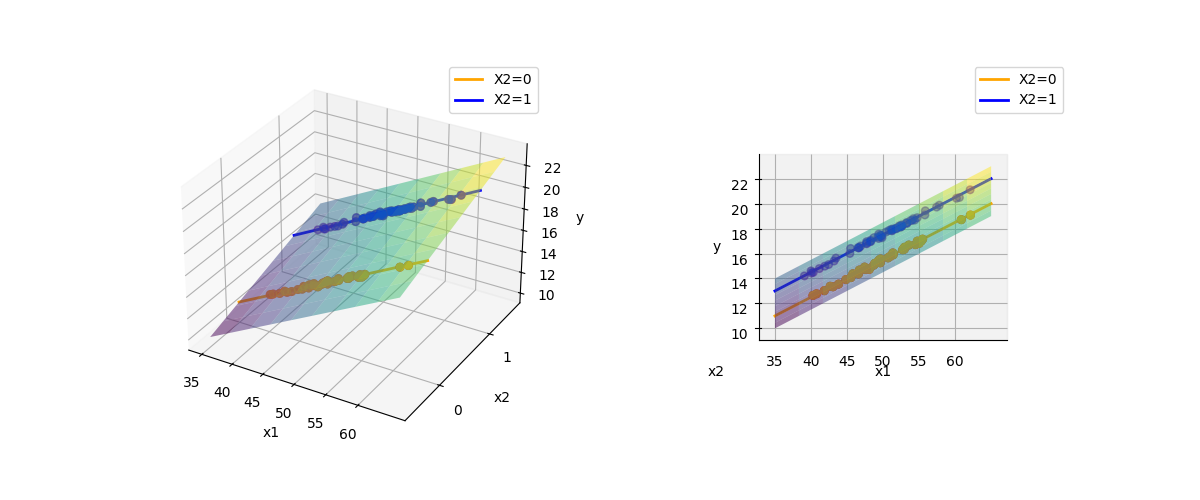

In [ ]:
rng = npr.default_rng(1024)
n = 100
x1 = rng.normal(50, 5, size=n)
x2 = rng.choice([0, 1], p=[0.4, 0.6], size=n) 

beta1 = 0.3
beta2 = 2.0
alpha = 0.5
eps = rng.normal(0, 0.1, size=n)
y = beta1 * x1 + beta2 * x2 + eps + alpha

fig = plt.figure(figsize=(12, 5))
gs = fig.add_gridspec(1, 2, wspace=0.3)

def apply(ax: plt.Axes):
    ax.scatter(x1, x2, y, color='r', s=30, marker='o')
    X1, X2 = np.meshgrid(np.linspace(50-3*5, 50+3*5, 10), np.linspace(-0.5, 1.5, 10))
    Yplane = beta1 * X1 + beta2 * X2 + alpha
    ax.plot_surface(X1, X2, Yplane, alpha=0.5, cmap='viridis', edgecolor='none')
    # Plot intersection lines for X2=0 (orange) and X2=1 (blue)
    x1_line = np.linspace(50-3*5, 50+3*5, 51, 100)
    y0 = beta1 * x1_line + beta2 * 0 + alpha
    y1 = beta1 * x1_line + beta2 * 1 + alpha

    ax.plot(x1_line, np.zeros_like(x1_line), y0, color='orange', linewidth=2, label='X2=0')
    ax.plot(x1_line, np.ones_like(x1_line), y1, color='blue', linewidth=2, label='X2=1')

    # Color points by x2 value
    colors = np.where(x2 == 0, 'orange', 'blue')
    ax.scatter(x1, x2, y, color=colors, s=30, marker='o')

    ax.legend()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    ax.set_xticks(np.arange(50-3*5, 50+3*5, 5))
    ax.set_yticks([0, 1])



ax = fig.add_subplot(gs[0, 0], projection='3d')
apply(ax)   

ax = fig.add_subplot(gs[0, 1], projection='3d')
apply(ax)

# Set the 3D view so we look along the x2 axis (side view)
ax.view_init(elev=0, azim=-90)
ax.set_proj_type('ortho')
ax.set_yticks([])

plt.show()